<a href="https://colab.research.google.com/github/TriDuks/AIXuLyAnh/blob/main/Number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Xử lý ảnh**



In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()


In [90]:
print(test_images.shape)
print(train_images.shape)

(10000, 28, 28)
(60000, 28, 28)


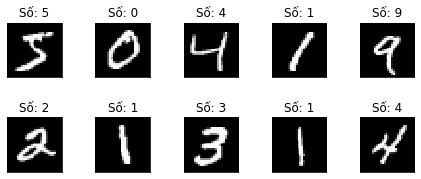

In [62]:
import matplotlib.pyplot as plt
for i in range(10):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i],cmap = 'gray', interpolation = 'none')
  plt.title('Số: {}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])


In [77]:
from keras.models import Sequential
from keras.layers import Dense
from keras import models

#Tạo mô hình
model = Sequential()
model.add(Dense(512, input_shape=(28*28,), activation='relu', name = 'layout'))
model.add(Dense(10, activation='linear',name = 'Output'))
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layout (Dense)              (None, 512)               401920    
                                                                 
 Output (Dense)              (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [85]:
from tensorflow.python import summary
from numpy.ma.core import reshape
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255


test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

#lệnh chuyển sang one off gren
from keras.utils import to_categorical
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)
#Biên dịch

In [80]:
from keras.backend import categorical_crossentropy

#Biên dịch1
model.compile(optimizer = 'rmsprop',loss = categorical_crossentropy, metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs = 10, batch_size = 128)
test_loss,test_acc = model.evaluate(test_images,test_labels)
print('test_accuracy: ', test_acc)
print('test_loss: ',test_loss)

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 12.8706 - accuracy: 0.1022
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 12.8706 - accuracy: 0.1022
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 12.8706 - accuracy: 0.1022
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 12.8706 - accuracy: 0.1022
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 12.8706 - accuracy: 0.1022
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 12.8706 - accuracy: 0.1022
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 12.8706 - accuracy: 0.1022
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 12.8706 - accuracy: 0.1022
Epoch 9/10
469/469 [==============================] - 4s 8ms/step - loss: 12.8706 - accuracy: 0.1022
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 12.8268 - accur

In [ ]:
#Lưu tham số
model.save('model1.h5')
model11 = load_model('model1.h5')
label1 = model11.predict